In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

2024-04-04 18:06:43.722985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/clasificacion_profesion/datos/train.csv')

In [3]:
# pre-process datos (si es necesario)

df= df.dropna(subset=['Work_Experience','Profession','Family_Size','Graduated_Yes'])

df['Profession'] = df['Profession'].replace({
    'Healthcare':0, 
    'Engineer':1, 
    'Lawyer':2, 
    'Entertainment':3, 
    'Artist':4,
    'Executive':5, 
    'Doctor':6, 
    'Homemaker':7, 
    'Marketing':8
})

df = pd.get_dummies(df)

In [4]:
yvar = df.Profession
xvars = df[[x for x in df.columns if x != 'Profession']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
# convertir datos en numpy arrays

xtrain = np.array(xtrain)
xtest= np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [7]:
# arquitectura del modelo utilizando variables - FUNCTIONAL API

# input
model_input = Input(shape=(xtrain.shape[1],))
# primera capa
layer_1 = Dense(256, kernel_regularizer='l2', activation='relu')(model_input)
#segunda capa
layer_2 = Dense(128, kernel_regularizer='l2', activation='relu')(layer_1)
# predicción
model_output = Dense(9, activation='softmax')(layer_2)
# entrada y salida
model = Model(inputs=model_input, 
              outputs=model_output)

In [8]:
error_train_history = []
error_test_history = []

num_epochs = 50

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002)

sparse_categorical_crossentropy = tf.keras.losses.SparseCategoricalCrossentropy()

for i in range(num_epochs):
    
    print('epoch number: {i}'.format(i=i+1))
    
    with tf.GradientTape() as t:
        
        # aplicar coeficientes a variables y predecir la y
        ytrain_hat = model(xtrain)
        ytest_hat = model(xtest)
        # calcular el error (que buscamos reducir)
        error_train = sparse_categorical_crossentropy(tf.expand_dims(ytrain, 1), ytrain_hat)
        error_test = sparse_categorical_crossentropy(tf.expand_dims(ytest, 1), ytest_hat)
        # guardar el error para visualizar luego
        error_train_history.append(error_train.numpy())
        error_test_history.append(error_test.numpy())
    
    # calcular los gradientes de cada uno de los coeficientes con respecto al error    
    gradients = t.gradient(error_train, model.trainable_weights)
    # restar los gradientes * learning_rate a cada uno de los coeficientes
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))     
    print('train error: {error_train}, test error: {error_test}'.format(error_train=error_train,error_test=error_test))

epoch number: 1
train error: 6.584392547607422, test error: 6.696893692016602
epoch number: 2
train error: 5.91874885559082, test error: 6.0239105224609375
epoch number: 3
train error: 5.350470542907715, test error: 5.4485344886779785
epoch number: 4
train error: 4.868042945861816, test error: 4.959479331970215
epoch number: 5
train error: 4.444605350494385, test error: 4.531658172607422
epoch number: 6
train error: 4.057406902313232, test error: 4.140682220458984
epoch number: 7
train error: 3.69779896736145, test error: 3.7775824069976807
epoch number: 8
train error: 3.367008924484253, test error: 3.4434144496917725
epoch number: 9
train error: 3.0710582733154297, test error: 3.1441986560821533
epoch number: 10
train error: 2.81795334815979, test error: 2.888397455215454
epoch number: 11
train error: 2.6150200366973877, test error: 2.6832573413848877
epoch number: 12
train error: 2.4672839641571045, test error: 2.534299612045288
epoch number: 13
train error: 2.3752050399780273, test 

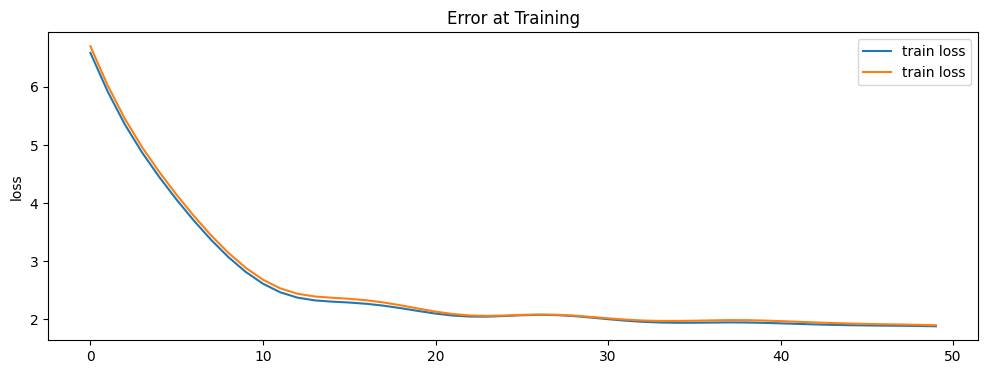

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(error_train_history)), error_train_history, label='train loss')
ax.plot(range(len(error_test_history)), error_test_history, label='train loss')
ax.legend()
plt.ylabel("loss")
plt.title('Error at Training')
plt.show()